<a href="https://colab.research.google.com/github/JapiKredi/Extract_Image_Text_Table_fromdocument/blob/main/Extract_Image_Text_Table_fromdocument.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "unstructured[all-docs]" pillow pydantic lxml matplotlib

In [2]:
!sudo apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [52.9 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,370 kB]
Hit:9 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,035 kB]
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,077 kB]
Get:13 https://ppa.launchpadc

In [3]:
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 51 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 0s (468 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 121752 

In [4]:
!sudo apt-get install libleptonica-dev tesseract-ocr libtesseract-dev python3-pil tesseract-ocr-eng tesseract-ocr-script-latn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libimagequant0 libraqm0 mailcap mime-support python3-olefile
  tesseract-ocr-osd
Suggested packages:
  python-pil-doc
The following NEW packages will be installed:
  libarchive-dev libimagequant0 libleptonica-dev libraqm0 libtesseract-dev
  mailcap mime-support python3-olefile python3-pil tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd tesseract-ocr-script-latn
0 upgraded, 13 newly installed, 0 to remove and 51 not upgraded.
Need to get 40.0 MB of archives.
After this operation, 123 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1 [581 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libimagequant0 amd64 2.17.0-1 [34.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,5

In [5]:
!pip install unstructured-pytesseract
!pip install tesseract-ocr

  Preparing metadata (setup.py) ... done
  Created wheel for tesseract-ocr: filename=tesseract_ocr-0.0.1-cp310-cp310-linux_x86_64.whl size=169757 sha256=e056b71706b6fcb9d72dda97f660697b1e82c8b3e2139e261fa5ff82f80c3324
  Stored in directory: /root/.cache/pip/wheels/bb/fd/f3/5c231ecbbb80a1fe33204ff3021d99b54ef6daf6f8099311b8
Successfully built tesseract-ocr


In [6]:
from unstructured.partition.pdf import partition_pdf

In [8]:
# Upload the following file to the local environment of Google Colab: https://arxiv.org/abs/2005.11401

raw_pdf_elements = partition_pdf(
    filename="/content/RAG-paper.pdf",
    strategy='hi_res',
    extract_images_in_pdf=True,
    extract_image_block_types=['Image','Table'],
    extract_image_block_to_payload=False,
    extract_image_block_output_dir="extracted_data"
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [25]:
tab=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Table" in str(type(element)):
            tab.append(str(element))

In [9]:
raw_pdf_elements

In [27]:
img=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Image" in str(type(element)):
            img.append(str(element))

In [28]:
img

['@--- ee ee ee ee ee ee ee ee ee ee eee The middle ear includes End-to-End Backprop through q and pe the tympanic cavity and the three ossicles. (y) Define "middle ear" (x) Question Answering: Question Query Retriever py Document Generator pg “fnower Generation Index. (Non-Parametric) (Parametric) d(z) supports (y) Barack Obama was born in Hawaii. (x) q(x) Fact Verification: Fact Query Fact Verification: Label Generation The Divine This 14th century work Comedy (x) is divided into 3 Jeopardy Question Generation: Answer Query sections: "Inferno", "purgatorio" & "Paradiso" @) Question Generation',
 'Document 1: his works are considered classics of American Doc 1 | | literature ... His wartime experiences formed the basis for his novel poe 2 | | “A Farewell to Arms” (1929) ... Doc 3 Document 2: ... artists of the 1920s “Lost Generation” expatriate Doe 4 community. His debut novel, "The Sun Also Rises”, was published °° in 1926. Doc 5 & , es ee £ te os & ss . TES eS',
 'Bee TT % 80 Porm S

In [29]:
tab=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Table" in str(type(element)):
            tab.append(str(element))

In [30]:
tab[0]

'Closed Book T5-11B [52] 34.5 T5-11B+SSM[52] 36.6 - - /50.1 37.4 /60.5 44.7 - - Model B-1 Label Acc. Open Book REALM [20] DPR [26] 40.4 / 41.5 57.9/ - - - 40.7 46.8 41.1 50.6 SotA BART - - 15.1 19.7 49.8* 49.9* 38.2 41.6 76.8 64.0 81.1 RAG-Token RAG-Seq. 44.1 55.2/66.1 45.5 50.0 44.5 56.8/68.0 45.2 52.2 RAG-Tok. 17.3 22.2 RAG-Seq. 14.7 21.4 40.1 40.8 41.5 44.2 72.5 89.5'

In [31]:
NarrativeText=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.NarrativeText" in str(type(element)):
            NarrativeText.append(str(element))


In [32]:
NarrativeText

["Patrick Lewis't, Ethan Perez*,",
 'Aleksandra Piktus†, Fabio Petroni†, Vladimir Karpukhin†, Naman Goyal†, Heinrich Küttler†,',
 'Mike Lewis†, Wen-tau Yih†, Tim Rocktäschel†‡, Sebastian Riedel†‡, Douwe Kiela†',
 'Large pre-trained language models have been shown to store factual knowledge in their parameters, and achieve state-of-the-art results when ﬁne-tuned on down- stream NLP tasks. However, their ability to access and precisely manipulate knowl- edge is still limited, and hence on knowledge-intensive tasks, their performance lags behind task-speciﬁc architectures. Additionally, providing provenance for their decisions and updating their world knowledge remain open research problems. Pre- trained models with a differentiable access mechanism to explicit non-parametric memory have so far been only investigated for extractive downstream tasks. We explore a general-purpose ﬁne-tuning recipe for retrieval-augmented generation (RAG) — models which combine pre-trained parametric and non

In [33]:
ListItem=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.ListItem" in str(type(element)):
            ListItem.append(str(element))

In [34]:
ListItem

['[1] Payal Bajaj, Daniel Campos, Nick Craswell, Li Deng, Jianfeng Gao, Xiaodong Liu, Rangan Majumder, Andrew McNamara, Bhaskar Mitra, Tri Nguyen, Mir Rosenberg, Xia Song, Alina Stoica, Saurabh Tiwary, and Tong Wang. MS MARCO: A Human Generated MAchine Reading COmprehension Dataset. arXiv:1611.09268 [cs], November 2016. URL http: //arxiv.org/abs/1611.09268. arXiv: 1611.09268.',
 '[2] Petr Baudiš and Jan Šediv`y. Modeling of the question answering task in the yodaqa system. In International Conference of the Cross-Language Evaluation Forum for European Languages, pages 222–228. Springer, 2015. URL https://link.springer.com/chapter/10.1007% 2F978-3-319-24027-5_20.',
 '[3] Jonathan Berant, Andrew Chou, Roy Frostig, and Percy Liang. Semantic Parsing on Freebase from Question-Answer Pairs. In Proceedings of the 2013 Conference on Empirical Methods in Natural Language Processing, pages 1533–1544, Seattle, Washington, USA, October 2013. Association for Computational Linguistics. URL http://ww

In [10]:
Header=[]
Footer=[]
Title=[]
NarrativeText=[]
Text=[]
ListItem=[]


for element in raw_pdf_elements:
  if "unstructured.documents.elements.Header" in str(type(element)):
            Header.append(str(element))
  elif "unstructured.documents.elements.Footer" in str(type(element)):
            Footer.append(str(element))
  elif "unstructured.documents.elements.Title" in str(type(element)):
            Title.append(str(element))
  elif "unstructured.documents.elements.NarrativeText" in str(type(element)):
            NarrativeText.append(str(element))
  elif "unstructured.documents.elements.Text" in str(type(element)):
            Text.append(str(element))
  elif "unstructured.documents.elements.ListItem" in str(type(element)):
            ListItem.append(str(element))



In [11]:
NarrativeText

["Patrick Lewis't, Ethan Perez*,",
 'Aleksandra Piktus†, Fabio Petroni†, Vladimir Karpukhin†, Naman Goyal†, Heinrich Küttler†,',
 'Mike Lewis†, Wen-tau Yih†, Tim Rocktäschel†‡, Sebastian Riedel†‡, Douwe Kiela†',
 'Large pre-trained language models have been shown to store factual knowledge in their parameters, and achieve state-of-the-art results when ﬁne-tuned on down- stream NLP tasks. However, their ability to access and precisely manipulate knowl- edge is still limited, and hence on knowledge-intensive tasks, their performance lags behind task-speciﬁc architectures. Additionally, providing provenance for their decisions and updating their world knowledge remain open research problems. Pre- trained models with a differentiable access mechanism to explicit non-parametric memory have so far been only investigated for extractive downstream tasks. We explore a general-purpose ﬁne-tuning recipe for retrieval-augmented generation (RAG) — models which combine pre-trained parametric and non

In [12]:
ListItem


['[1] Payal Bajaj, Daniel Campos, Nick Craswell, Li Deng, Jianfeng Gao, Xiaodong Liu, Rangan Majumder, Andrew McNamara, Bhaskar Mitra, Tri Nguyen, Mir Rosenberg, Xia Song, Alina Stoica, Saurabh Tiwary, and Tong Wang. MS MARCO: A Human Generated MAchine Reading COmprehension Dataset. arXiv:1611.09268 [cs], November 2016. URL http: //arxiv.org/abs/1611.09268. arXiv: 1611.09268.',
 '[2] Petr Baudiš and Jan Šediv`y. Modeling of the question answering task in the yodaqa system. In International Conference of the Cross-Language Evaluation Forum for European Languages, pages 222–228. Springer, 2015. URL https://link.springer.com/chapter/10.1007% 2F978-3-319-24027-5_20.',
 '[3] Jonathan Berant, Andrew Chou, Roy Frostig, and Percy Liang. Semantic Parsing on Freebase from Question-Answer Pairs. In Proceedings of the 2013 Conference on Empirical Methods in Natural Language Processing, pages 1533–1544, Seattle, Washington, USA, October 2013. Association for Computational Linguistics. URL http://ww

In [13]:
img=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Image" in str(type(element)):
            img.append(str(element))

In [14]:
img[2]

'Bee TT % 80 Porm Sa SRS nana ga g / Z fr = 70 2 | / 3 RAG TORRE 2 nf |! g <= RAG-Tok B-1 Ba Ze H=- RAGSeq RL a ; 3 Zs == RAG-Seq BA Q 50 > 50 ZO — reactor | & 3 soft === RAGSeq | Z 40 2 4s rr rr rr nr) rr nr K Retrieved Docs K Retrieved Docs K Retrieved Docs'

In [22]:
!pip install langchain_core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.3/299.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.0/116.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [23]:
!pip install langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00


In [35]:
len(tab)

5

In [36]:
tab[0]

'Closed Book T5-11B [52] 34.5 T5-11B+SSM[52] 36.6 - - /50.1 37.4 /60.5 44.7 - - Model B-1 Label Acc. Open Book REALM [20] DPR [26] 40.4 / 41.5 57.9/ - - - 40.7 46.8 41.1 50.6 SotA BART - - 15.1 19.7 49.8* 49.9* 38.2 41.6 76.8 64.0 81.1 RAG-Token RAG-Seq. 44.1 55.2/66.1 45.5 50.0 44.5 56.8/68.0 45.2 52.2 RAG-Tok. 17.3 22.2 RAG-Seq. 14.7 21.4 40.1 40.8 41.5 44.2 72.5 89.5'

In [37]:
len(img)

4

In [38]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

In [39]:
# Prompt
prompt_text = """You are an assistant tasked with summarizing tables for retrieval. \
    These summaries will be embedded and used to retrieve the raw table elements. \
    Give a concise summary of the table that is well optimized for retrieval. Table {element} """

In [40]:
prompt = ChatPromptTemplate.from_template(prompt_text)

In [41]:
import os
from google.colab import userdata
OPENAI_API_TOKEN=userdata.get('OPENAI_API_KEY')
os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

In [42]:
# Text summary chain
model = ChatOpenAI(temperature=0, model="gpt-4")

In [43]:
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [44]:
table_summaries = []

In [45]:
table_summaries=summarize_chain.batch(tab,{"max_concurrency": 5})

In [46]:
tab[0]

'Closed Book T5-11B [52] 34.5 T5-11B+SSM[52] 36.6 - - /50.1 37.4 /60.5 44.7 - - Model B-1 Label Acc. Open Book REALM [20] DPR [26] 40.4 / 41.5 57.9/ - - - 40.7 46.8 41.1 50.6 SotA BART - - 15.1 19.7 49.8* 49.9* 38.2 41.6 76.8 64.0 81.1 RAG-Token RAG-Seq. 44.1 55.2/66.1 45.5 50.0 44.5 56.8/68.0 45.2 52.2 RAG-Tok. 17.3 22.2 RAG-Seq. 14.7 21.4 40.1 40.8 41.5 44.2 72.5 89.5'

In [47]:
table_summaries[0]

"The table presents a comparison of different models' performance in terms of accuracy. The models include Closed Book T5-11B, T5-11B+SSM, Open Book REALM, DPR, SotA BART, RAG-Token, RAG-Seq, and RAG-Tok. The performance metrics are given in various formats, including single values, ranges, and values with asterisks. The highest accuracy is achieved by the RAG-Seq model with a score of 89.5."

In [48]:
img[0]

'@--- ee ee ee ee ee ee ee ee ee ee eee The middle ear includes End-to-End Backprop through q and pe the tympanic cavity and the three ossicles. (y) Define "middle ear" (x) Question Answering: Question Query Retriever py Document Generator pg “fnower Generation Index. (Non-Parametric) (Parametric) d(z) supports (y) Barack Obama was born in Hawaii. (x) q(x) Fact Verification: Fact Query Fact Verification: Label Generation The Divine This 14th century work Comedy (x) is divided into 3 Jeopardy Question Generation: Answer Query sections: "Inferno", "purgatorio" & "Paradiso" @) Question Generation'

In [49]:
import base64
import os
from langchain_core.messages import HumanMessage

In [50]:
def encode_image(image_path):
    """Getting the base64 string"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

In [51]:
def image_summarize(img_base64, prompt):
    """Make image summary"""


    chat = ChatOpenAI(model="gpt-4-vision-preview", max_tokens=1024)

    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},

                     {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content

In [52]:
def generate_img_summaries(path):
    """
    Generate summaries and base64 encoded strings for images
    path: Path to list of .jpg files extracted by Unstructured
    """

    # Store base64 encoded images
    img_base64_list = []

    # Store image summaries
    image_summaries = []

    # Prompt
    prompt = """You are an assistant tasked with summarizing images for retrieval. \
    These summaries will be embedded and used to retrieve the raw image. \
    Give a concise summary of the image that is well optimized for retrieval."""


    base64_image = encode_image(path)
    img_base64_list.append(base64_image)
    image_summaries.append(image_summarize(base64_image, prompt))

    return img_base64_list, image_summaries

In [53]:
fpath="/content/extracted_data/figure-17-4.jpg"

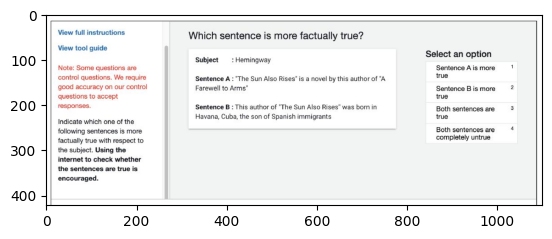

In [61]:
from PIL import Image

# replace 'image.jpg' with the path to your image file
image = Image.open(fpath)

import matplotlib.pyplot as plt

plt.imshow(image)
plt.show()

In [54]:
img_base64_list,image_summaries=generate_img_summaries(fpath)

In [55]:
image_summaries[0]

'The image displays a user interface for a task that involves verifying the factual accuracy of two sentences about the author Hemingway. The left side contains links to full instructions and a tool guide, along with a note about the importance of accuracy in control questions. The main content area presents the task: "Which sentence is more factually true?" with two sentences to evaluate concerning Hemingway\'s works and birthplace. On the right, there\'s an option panel to select which sentence is more true: Sentence A, Sentence B, both are true, or both are completely untrue.'

In [56]:
fpath2="/content/extracted_data/figure-2-1.jpg"

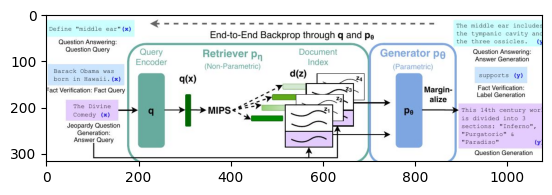

In [62]:
from PIL import Image

# replace 'image.jpg' with the path to your image file
image = Image.open(fpath2)

import matplotlib.pyplot as plt

plt.imshow(image)
plt.show()

In [57]:
img_base64_list,image_summaries=generate_img_summaries(fpath2)

In [58]:
image_summaries[0]

"The image is a diagram of an information retrieval system with a machine learning architecture for question answering, fact verification, and question generation. It includes components labeled 'Query Encoder', 'Retriever', and 'Generator', with arrows indicating the flow of data. There are example queries for different tasks and their corresponding example outputs on the sides, showcasing the system's end-to-end backpropagation capabilities. The Retriever uses a MIPS (Maximum Inner Product Search) mechanism to interact with a Document Index."

In [63]:
fpath3="/content/extracted_data/figure-7-2.jpg"

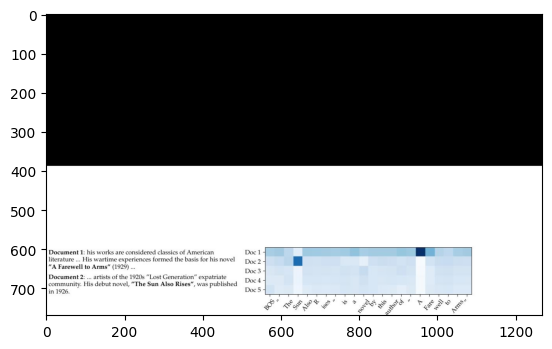

In [64]:
from PIL import Image

# replace 'image.jpg' with the path to your image file
image = Image.open(fpath3)

import matplotlib.pyplot as plt

plt.imshow(image)
plt.show()

In [65]:
img_base64_list,image_summaries=generate_img_summaries(fpath3)

In [66]:
image_summaries[0]

'This image contains a text excerpt and a heatmap visualization related to document analysis. The text provides information about two classic American literature works, with references to "A Farewell to Arms" and "The Sun Also Rises." The heatmap appears to show the distribution of specific terms across five different documents (Doc 1-5), with varying intensity indicating the frequency or relevance of the terms to each document. Terms mentioned include "BOS," "The Sun Also Rises," "is a novel by," "author," and "A Farewell to Arms."'